In [5]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py

# 뉴튼 랩슨법<br>Newton Rapson Method

10의 제곱근을 구하기 위해 사용했던 함수를 생각해 보자.<br>Let's think about the function that we used to find the square root of 10.

$$
f(x)=x^2-10
$$

이 함수는 연속이고 미분 가능하다.<br>This function is continuous and differentiable.

$$
\frac{d}{dx}f\left(x\right)=2x
$$

In [6]:
# 이 함수를 0으로 만드는 x 를 찾고자 함
# Intend to find x making the function below zero
def f(x):
    return x ** 2 - 10
d = f(3)
print(d)

# 위 함수의 x에 대한 미분을 정의
# x-Derivative of the function above
def df_dx(x):
    return 2 * x

-1


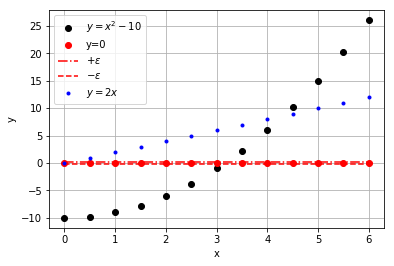

In [3]:
epsilon = 1e-3

# x 의 범위와 간격을 지정 
# Specify range and interval of x
x_start = 0
x_end = 6
x_interval = 0.5


def plot(x_start, x_end, x_interval=None):
    #만약 간격값이 넣어지지 않으면 새로운 간격을 정의
    if x_interval is None:
        x_interval = x_end - x_start

    x = py.arange(x_start, x_end+0.1*x_interval, x_interval)
    # y = x^2
    py.plot(x, f(x), 'ko', label='$y=x^2-10$')
    # y = 0
    #py.zeros_like(변수값)
    py.plot(x, py.zeros_like(x), 'ro', label='y=0')

    # +/- epsilon
    epsilon=0.15
    py.plot(x, epsilon * py.ones_like(x), 'r-.', label='$+\epsilon$')
    py.plot(x, -epsilon * py.ones_like(x), 'r--', label='$-\epsilon$')

    # x 축 이름표
    # x axis label
    py.xlabel('x')

    # y 축 이름표
    # y axis label
    py.ylabel('y')

    # 범례 표시
    # Show legend
    py.legend()

    # 모눈 표시
    # Indicate grid
    py.grid()
    
    return x

def plot_tangent(x_array):
    # y = 2x
    py.plot(x_array, 2 * x_array, 'b.', label='$y=2x$')

    # 범례 표시
    # Show legend
    py.legend()

x_array = plot(x_start, x_end, x_interval)
plot_tangent(x_array)

이를 이용하여, 원하는 위치 $x_i$ 에서의 접선을 그릴 수 있다.<br>Using this, we can plot tangents at desirable locations of $x_i$.

$$
y_{tangent}=\frac{d}{dx}f\left(x_i\right) \left(x-x_i \right) + y_i
$$

여기서 $y_i=f\left(x_i\right)$ 이다.<br>Here, $y_i=f\left(x_i\right)$.

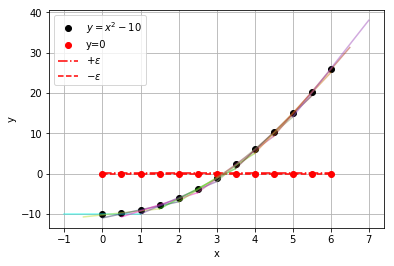

In [4]:
import numpy.random as nr
#뭐야 이건
nr.seed()

def plot_one_tangent(x_i, x_interval):
    y_i = f(x_i)
    slope = 2 * x_i
    
    x_tangent_array = py.linspace(x_i - x_interval * 2, x_i + x_interval * 2, 4+1)
    y_tangent_array = slope * (x_tangent_array - x_i) + y_i
    
    py.plot(x_tangent_array, y_tangent_array, color=nr.random(3), alpha=0.5)

def plot_many_tangents(x_array):

    x_interval = x_array[1] - x_array[0]

    for x_i in x_array:
        
        plot_one_tangent(x_i, x_interval)

x = plot(x_start, x_end, x_interval)

plot_many_tangents(x)

기울기가 0이 아니라면, 접선은 $x$축과 만날 것이다. 그 교점의 $x$ 좌표를 $x_j$라 하자.<br>If the slope is not zero, the tangent would intersect with $x$ axis. Let $x_j$ be the $x$ coordinate of the intersection.

$$
\begin{align}
\frac{d}{dx}f\left(x_i\right) \left(x_j-x_i \right) + y_i=0 \\
\frac{d}{dx}f\left(x_i\right) \left(x_j-x_i \right)=-f\left(x_i\right) \\
\left(x_j-x_i \right)=-\frac{f\left(x_i\right)}{\frac{d}{dx}f\left(x_i\right)} \\
x_j=x_i-\frac{f\left(x_i\right)}{\frac{d}{dx}f\left(x_i\right)} \\
\end{align}
$$

기울기가 0이라면 $x_j$를 찾는 것은 쉽지 않을 것이다.<br>If the slope is zero, finding $x_j$ would not be easy.

$x_i=5$ 지점에서의 접선을 그려 보자.<br>Let's plot tanget at $x_i=5$.

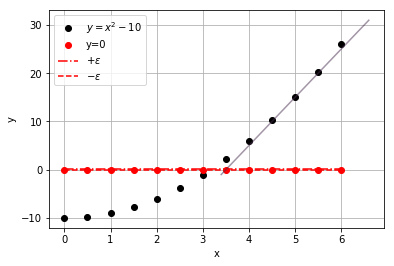

In [5]:
x = plot(x_start, x_end, x_interval)
x_i = 5
plot_one_tangent(x_i, 0.8)

$x_j$를 한번 계산해 보자.<br>Let's calculate $x_j$, too.

In [3]:
x_j = x_i - f(x_i) / (2 * x_i)

NameError: name 'x_i' is not defined

In [4]:
x_j

NameError: name 'x_j' is not defined

In [8]:
f(x_j)

2.25

$x_j$ 값은 10의 제곱근에 $x_i$ 보다 가까와졌다.<br> $x_j$ is closer to $\sqrt{10}$ than $x_i$.

$x_i$에 $x_j$ 값을 넣고 한번 더 반복해 보자.<br>Let's iterate once more with $x_j$ as new $x_i$.

In [9]:
x_i = x_j

In [10]:
x_j = x_i - f(x_i) / (2 * x_i)

In [11]:
x_j

3.1785714285714284

In [12]:
f(x_j)

0.10331632653061185

새로운 $x_j$ 값은 10의 제곱근에 더 가까와졌다.<br>New $x_j$ is even closer to the square root of 10.

## 뉴튼 랩슨법 구현<br>Implementing Newton Raphson Method

In [13]:
epsilon = 1e-3


# x 의 범위와 간격을 지정 
# Specify range and interval of x
x_initial = 5.0

# 이 함수를 0으로 만드는 x 를 찾고자 함
# Intend to find x making the function below zero
def f(x):
    return x ** 2 - 10


# 위 함수의 x에 대한 미분
# x-Derivative of the function above
def df_dx(x):
    return 2 * x

In [14]:
def newton_raphson(f, df_dx, x_initial, epsilon):
    """
    뉴튼 랩슨 법
    Newton Raphson Method
    
    f : f(x) = 0 을 만족하는 x 를 찾고자 하는 함수 Function that we want to find x satisfying f(x) = 0
    df_dx : f(x) 함수의 x 에 대한 미분 x-derivative of the function above
    x_initial : x의 초기값 Initial value of x
    epsilon : 희망하는 근의 정밀도 Desirable precision of the root
    """
    counter = 0
    
    # 변수 x_i 를 초기화
    # Initialize variable x_i
    x_i = x_initial

    # f(x_i) 의 절대값이 epsilon 보다 더 크다면 계속 반복
    # Iterate while the absolute value of f(x) is larger than epsilon
    while abs(f(x_i)) > epsilon:
        # x_i 지점에서의 접선의 기울기
        # Slope of the tangent at x_i
        slope = df_dx(x_i)
        
        assert abs(slope) > epsilon

        # 접선과 x축의 교점
        # Intersection of the tangent and the x axis
        x_i += - f(x_i) / slope

        counter += 1
    
    print('counter =', counter)
        
    return x_i


sqrt_10 = newton_raphson(f, df_dx, x_initial, epsilon)

# 뉴튼 랩슨법으로 찾은 10의 제곱근
# Square root of 10 that we just found using the Newton Raphson method
print('sqrt_10 =', sqrt_10)
# 아래 연산의 결과는 0인가?
# Is the result of the following calculation zero?
print('sqrt_10 ** 2 - 10 =', sqrt_10 ** 2 - 10)

counter = 3
sqrt_10 = 3.162319422150883
sqrt_10 ** 2 - 10 = 0.00026412771269335167


도전 과제 : $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$ 인 $\theta^{\circ}$를 구해 보시오.<br>Try this: Find $\theta^{\circ}$ satisfying $sin^2(\theta^{\circ})+\frac{1}{90}\pi\theta^{\circ}=0.5$.